In [26]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# import dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [28]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [29]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [30]:
y = y.reshape(len(y), 1)

In [31]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [33]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, np.ravel(y))

SVR()

In [34]:
# predicting a new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

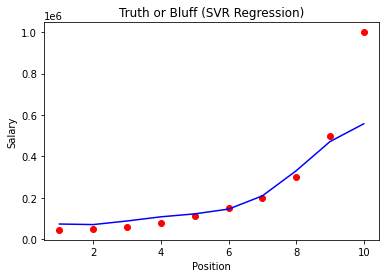

In [43]:
# Visualizing the SVR Results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

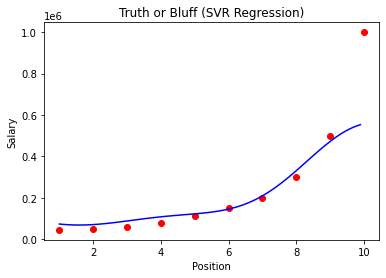

In [45]:
# Visualize the SVR Results w/ higher resolution
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()